/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<AxesSubplot:title={'center':'Weather Conditions'}>

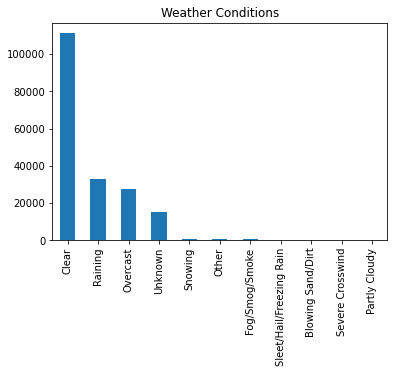

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv("Data-Collisions.csv", delimiter=",")
df['ROADCOND']=df['ROADCOND'].astype('string')
df['SEVERITYCODE.1']=df['SEVERITYCODE.1'].astype('int')
#df.dtypes


#df['ROADCOND']=df['ROADCOND'].astype('string')
#df.groupby('ROADCOND').size()

#count_blank

#count_blank= df.count('ROADCOND')
#df.groupby('ROADCOND').value_counts()
df.head()

## COUNT BLANKS
#count_blank= df['ROADCOND'].isna().sum()
#count_blankimport pandas as pd


#df['ROADCOND'].value_counts()

plt.title('Weather Conditions')
#fig.suptitle('test title', fontsize=20
df['WEATHER'].value_counts().plot(kind= 'bar')
#df.groupby('ROADCOND').count().plot(kind='bar')

<AxesSubplot:title={'center':'Severity Condition'}>

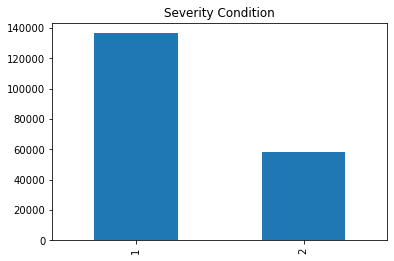

In [14]:
plt.title('Severity Condition')

df['SEVERITYCODE.1'].value_counts().plot(kind= 'bar')

<AxesSubplot:title={'center':'Road Condition'}>

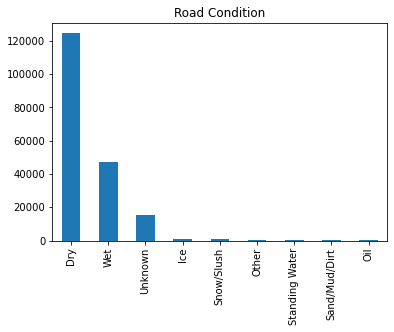

In [15]:
plt.title('Road Condition')
df['ROADCOND'].value_counts().plot(kind= 'bar')

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df.groupby('SEVERITYCODE.1')['ROADCOND'].value_counts()
#df['SEVERITYCODE.1'].value_counts().plot(kind= 'bar')

SEVERITYCODE.1  ROADCOND      
1               Dry               84446
                Wet               31719
                Unknown           14329
                Ice                 936
                Snow/Slush          837
                Other                89
                Standing Water       85
                Sand/Mud/Dirt        52
                Oil                  40
2               Dry               40064
                Wet               15755
                Unknown             749
                Ice                 273
                Snow/Slush          167
                Other                43
                Standing Water       30
                Oil                  24
                Sand/Mud/Dirt        23
Name: ROADCOND, dtype: int64

In [20]:
!pip install -U imbalanced-learn


     |████████████████████████████████| 174kB 6.0MB/s eta 0:00:01
     |████████████████████████████████| 6.8MB 6.7MB/s eta 0:00:01             | 3.5MB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 307kB 8.9MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [21]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#df['ROADCOND']=df['ROADCOND'].astype('int')

df['SEVERITYCODE.1']=df['SEVERITYCODE.1'].astype('category')
df['WEATHER']=df['WEATHER'].astype('category')
df['ROADCOND']=df['ROADCOND'].astype('category')
df['LIGHTCOND']=df['LIGHTCOND'].astype('category')
#df['PERSONCOUNT']=df['PERSONCOUNT'].astype('category')
x=df[['ROADCOND', 'WEATHER','LIGHTCOND']]
y=df['SEVERITYCODE.1']
#x,y = make_classification(n_samples=136485,weights=[0.99], flip_y=0)
rus= RandomUnderSampler(random_state=58188, replacement=True)
x_rus, y_rus= rus.fit_resample(x,y)


#df['SEVERITYCODE.1'].value_counts()
print ('original shape', df['SEVERITYCODE.1'].value_counts())
print ('original shape', y_rus.value_counts())

original shape 1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64
original shape 2    58188
1    58188
Name: SEVERITYCODE.1, dtype: int64


In [22]:
df2=x_rus
#df4.groupby('SEVERITYCODE.1')['ROADCOND'].value_counts()

In [186]:
df2.head()

,ROADCOND,WEATHER,LIGHTCOND
0,Wet,Overcast,Dark - Street Lights On
1,Dry,Clear,Daylight
2,Dry,Clear,Dark - Street Lights On
3,Dry,Clear,Dark - Street Lights On
4,Dry,Clear,Daylight


In [23]:
from sklearn.preprocessing import LabelEncoder
df2['ROADCOND']=df['ROADCOND'].cat.codes
df2['WEATHER']=df['WEATHER'].cat.codes
df2['LIGHTCOND']=df['LIGHTCOND'].cat.codes
df2.head()

,ROADCOND,WEATHER,LIGHTCOND
0,8,4,5
1,8,6,2
2,0,4,5
3,0,1,5
4,8,6,5


In [188]:
df2.groupby('WEATHER')['ROADCOND'].value_counts()

WEATHER  ROADCOND
-1       -1          214
          0            1
          7            1
 0        0           19
          8            5
                    ... 
 10       5           83
          1           67
          3           10
          4            6
          6            3
Name: ROADCOND, Length: 77, dtype: int64

## Normalize

In [189]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x_rus).transform(x_rus.astype(float))
X[0:5]

array([[ 1.45987529,  0.28777247,  0.34106894],
       [ 1.45987529,  0.97672851, -1.36808445],
       [-0.72291105,  0.28777247,  0.34106894],
       [-0.72291105, -0.7456616 ,  0.34106894],
       [ 1.45987529,  0.97672851,  0.34106894]])

## Train Test

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x_rus, y_rus, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81463, 3) (81463,)
Test set: (34913, 3) (34913,)


## Classification

### KNN

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [193]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 2, 2, 2, 2])

In [194]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5091636693959221
Test set Accuracy:  0.5096096010082204


In [121]:
Ks = 6
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.4907914 , 0.49634807, 0.47956349, 0.48016498, 0.5078624 ])

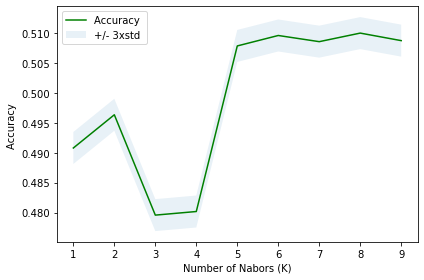

In [115]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### F-1 Score

In [195]:
from sklearn.metrics import f1_score
print('KNN-F1Score',f1_score(y_test, yhat, average='weighted'))


KNN-F1Score 0.4995361881968596


## jaccard_similarity_score

In [197]:
#!pip install jaccard-index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)


0.27197346600331673

# Decision Tree

### Modelling

In [204]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.3, random_state=3)
drugTree.fit(x_train,y_train)
predTree = drugTree.predict(x_test)

In [206]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5253344026580357


### Visualization

In [207]:
from sklearn.model_selection import train_test_split
from sklearn import externals
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [208]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

NameError: name 'StringIO' is not defined

In [209]:
print('KNN-F1Score',f1_score(y_test, yhat, average='weighted'))


KNN-F1Score 0.4926055235839933


In [210]:
jaccard_score(y_test, yhat)

0.2687252506529615

# Logistic Regression

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [212]:
yhat = LR.predict(x_test)
yhat

array([1, 1, 2, ..., 2, 1, 1])

In [213]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.51064992, 0.48935008],
       [0.51787741, 0.48212259],
       [0.48385449, 0.51614551],
       ...,
       [0.45818543, 0.54181457],
       [0.52781324, 0.47218676],
       [0.51787741, 0.48212259]])

In [214]:
jaccard_score(y_test, yhat)

0.4001509596722019

In [215]:
print('LR-F1Score',f1_score(y_test, yhat, average='weighted'))

LR-F1Score 0.5159919586567004


In [216]:
print("LR's Accuracy: ", metrics.accuracy_score(y_test, yhat))

LR's Accuracy:  0.5219832154211899
